In [1]:
from PIL import Image
import os
import numpy as np
import csv

In [2]:
from russian_signs.get_data import get_data as get_data_russian
from swedish_signs.get_data import get_data as get_data_swedish

data = get_data_russian()
input_shape = data['input_shape']
LABELS = data['LABELS']
images = data['images']

# model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(LABELS), activation='softmax'))
    return model

Using TensorFlow backend.


In [34]:
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

data = []
labels = []

image_width = 1280.0
image_height = 720.0

to_train = np.random.choice(images, 10000)

for i, image in enumerate(to_train):
    if i % 1000 == 0:
        print(i)
    img = Image.open(image['filename'])
    for sign in image['signs']:
        im = img.crop((sign['xmin'] * image_width,
                       sign['ymin'] * image_height,
                       sign['xmax'] * image_width,
                       sign['ymax'] * image_height))
        im = im.resize((input_shape[0], input_shape[1]))
#         plt.imshow(im)
#         plt.show()
        im = img_to_array(im)
        data.append(im)
        label = np.zeros(len(LABELS))
        label[LABELS.index(sign['name'])] = 1.0
        labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [35]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25)

In [36]:
from keras.preprocessing.image import ImageDataGenerator

model = get_model()
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False)
 
batch_size = 64    

H = model.fit_generator(datagen.flow(trainX, trainY, batch_size=batch_size), 
                        validation_data=(testX, testY), 
                        epochs=100, verbose=1)
 
    
# !!!! MODIFY THIS !!!!    
model.save("classify_croped_weights_russian")

Epoch 1/100
61/61 [==============================] - 3s 44ms/step - loss: 3.9131 - acc: 0.2187 - val_loss: 3.3984 - val_acc: 0.2932
Epoch 2/100
61/61 [==============================] - 2s 33ms/step - loss: 3.1597 - acc: 0.3449 - val_loss: 2.7959 - val_acc: 0.3943
Epoch 3/100
61/61 [==============================] - 2s 35ms/step - loss: 2.5932 - acc: 0.4331 - val_loss: 2.3502 - val_acc: 0.4730
Epoch 4/100
61/61 [==============================] - 2s 35ms/step - loss: 2.3324 - acc: 0.4753 - val_loss: 2.0740 - val_acc: 0.5069
Epoch 5/100
61/61 [==============================] - 2s 35ms/step - loss: 2.1188 - acc: 0.5226 - val_loss: 1.8237 - val_acc: 0.6080
Epoch 6/100
61/61 [==============================] - 2s 35ms/step - loss: 1.9524 - acc: 0.5518 - val_loss: 1.7908 - val_acc: 0.6042
Epoch 7/100
61/61 [==============================] - 2s 35ms/step - loss: 1.7830 - acc: 0.5817 - val_loss: 1.5372 - val_acc: 0.6497
Epoch 8/100
61/61 [==============================] - 2s 35ms/step - loss: 1.

61/61 [==============================] - 2s 38ms/step - loss: 0.5069 - acc: 0.8662 - val_loss: 0.4189 - val_acc: 0.9012
Epoch 63/100
61/61 [==============================] - 2s 35ms/step - loss: 0.4671 - acc: 0.8748 - val_loss: 0.4535 - val_acc: 0.8866
Epoch 64/100
61/61 [==============================] - 2s 35ms/step - loss: 0.4880 - acc: 0.8709 - val_loss: 0.4266 - val_acc: 0.9005
Epoch 65/100
61/61 [==============================] - 2s 35ms/step - loss: 0.4895 - acc: 0.8627 - val_loss: 0.4066 - val_acc: 0.8981
Epoch 66/100
61/61 [==============================] - 2s 36ms/step - loss: 0.4834 - acc: 0.8677 - val_loss: 0.5060 - val_acc: 0.8812
Epoch 67/100
61/61 [==============================] - 2s 36ms/step - loss: 0.4763 - acc: 0.8723 - val_loss: 0.4411 - val_acc: 0.8920
Epoch 68/100
61/61 [==============================] - 2s 35ms/step - loss: 0.4831 - acc: 0.8711 - val_loss: 0.4496 - val_acc: 0.8966
Epoch 69/100
61/61 [==============================] - 2s 36ms/step - loss: 0.4921 

Text(0.5,1,'Accuracy Curves')

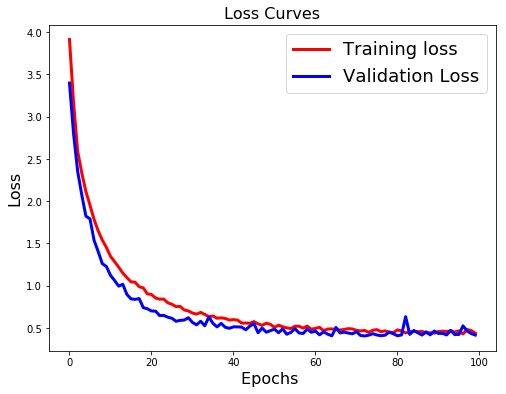

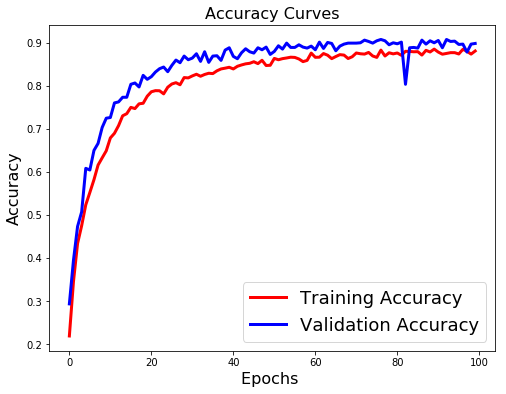

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(H.history['loss'],'r',linewidth=3.0)
plt.plot(H.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(H.history['acc'],'r',linewidth=3.0)
plt.plot(H.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [10]:
model.predict(np.expand_dims(data[10], axis=0))

array([[  2.55936766e-06,   5.81874701e-07,   6.15879827e-08,
          3.46951092e-12,   2.45977139e-06,   3.74798689e-13,
          2.34450363e-06,   4.99759551e-07,   4.31818137e-08,
          8.88232989e-08,   9.04299304e-06,   2.15256637e-06,
          6.92844689e-02,   8.18045855e-01,   4.02522244e-04,
          4.30071168e-02,   6.90983236e-02,   1.39513839e-04,
          2.38465577e-06,   1.77986993e-13]], dtype=float32)